<a href="https://colab.research.google.com/github/dibend/Colab/blob/main/Real_Estate_Zip_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zillow Seasonally Adjusted Smoothed Home Value Data for Zip Code Input**



Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range.

[Zillow Data Source](https://www.zillow.com/research/data/)

Text(value='', description='Zip Code:')

Button(description='Submit', style=ButtonStyle(button_color='lightgreen'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

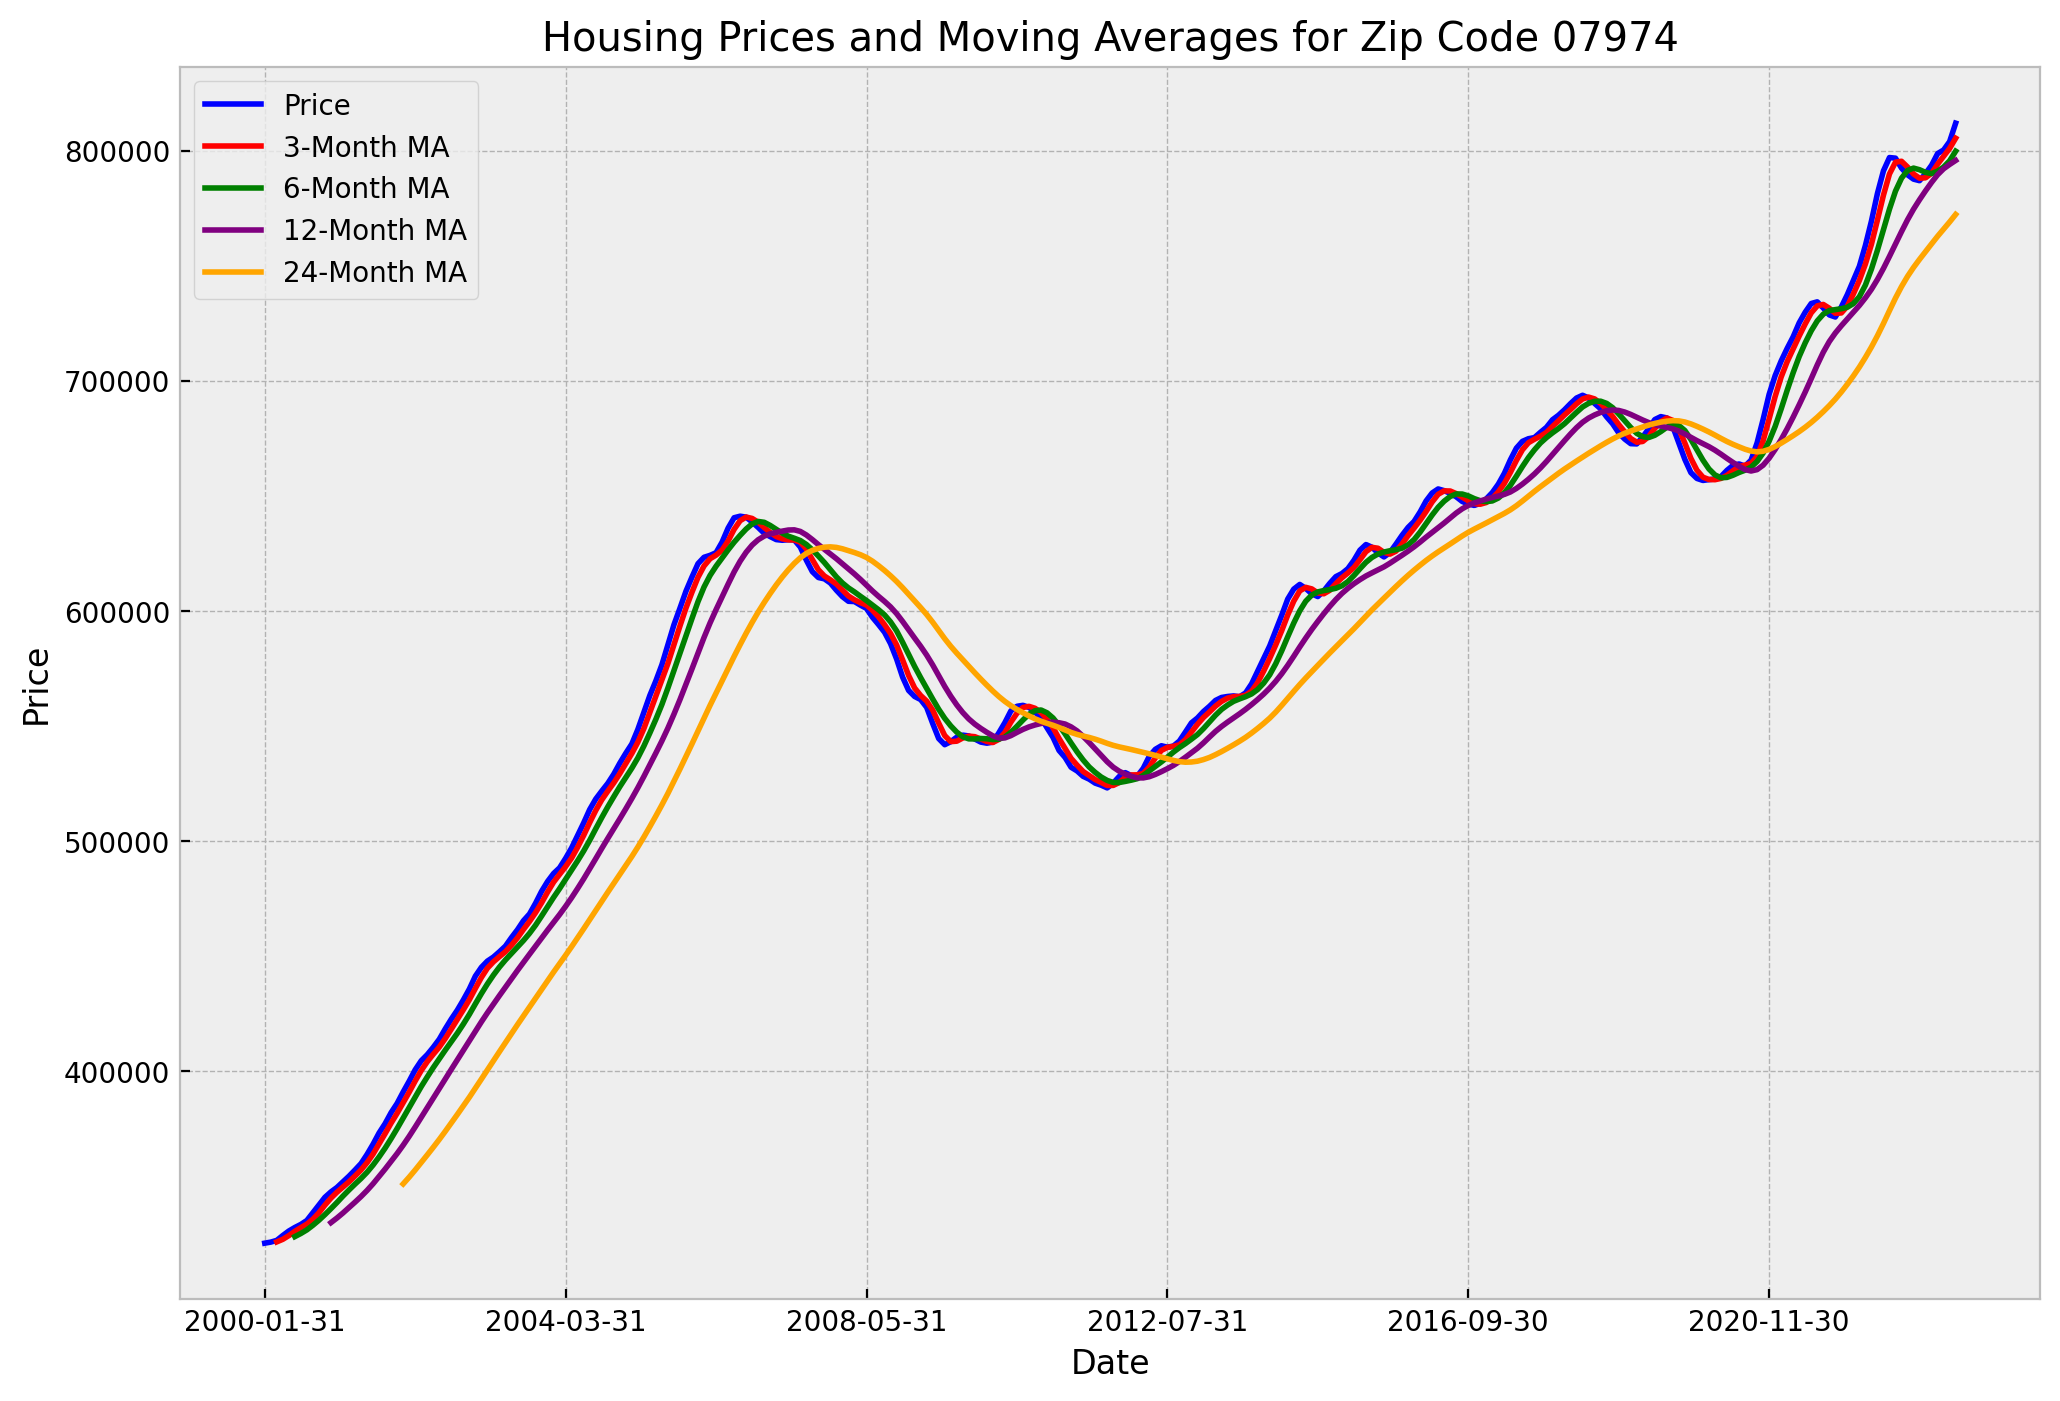

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import ipywidgets as widgets

plt.style.use("bmh")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

# Create a text box for the zip code
zip_text_box = widgets.Text(description='Zip Code:')
display(zip_text_box)

# Create a button to submit the zip
submit_button = widgets.Button(description='Submit')
submit_button.style.button_color = 'lightgreen'
display(submit_button)

def submit_callback(button):
  zip = zip_text_box.value

  # Read the CSV file
  df = pd.read_csv('https://files.zillowstatic.com/research/public_csvs/zhvi/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1690148269')

  # Extract the data for zip code
  df = df[df['RegionName'] == int(zip)]

  # Select the columns with dates
  df = df.loc[:, '2000-01-31':]

  # Transpose the data
  df = df.T

  # Compute the moving averages
  df_ma3 = df.rolling(3).mean()
  df_ma6 = df.rolling(6).mean()
  df_ma12 = df.rolling(12).mean()
  df_ma24 = df.rolling(24).mean()

  # Plot the price data
  ax = df.plot(color='blue')

  # Plot the moving averages
  df_ma3.plot(ax=ax, color='red')
  df_ma6.plot(ax=ax, color='green')
  df_ma12.plot(ax=ax, color='purple')
  df_ma24.plot(ax=ax, color='orange')

  # Add a title
  ax.set_title(f'Housing Prices and Moving Averages for Zip Code {zip}')

  # Add axis labels
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')

  # Add a legend
  ax.legend(['Price', '3-Month MA', '6-Month MA', '12-Month MA', '24-Month MA'])

  plt.savefig(f'{zip}_Prices_and_MAs.pdf')
  files.download(f'{zip}_Prices_and_MAs.pdf')

  # Show the plot
  plt.show()

# Set the submit button's callback to the function we just defined
submit_button.on_click(submit_callback)